# Outlier Handling Notebook

This notebook demonstrates methods to detect and handle outliers in a dataset. Outliers can skew data analysis, so handling them is crucial to ensure reliable results. The methods covered include:
1. **Z-Score Method**
2. **Interquartile Range (IQR)**
3. **Box Plot Analysis**
4. **Scatter Plot Visualization**


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Loading the Dataset

We will use a small dataset containing numerical columns with artificially introduced outliers.


In [2]:
# Sample dataset with outliers
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [25, 27, 29, 31, 33, 35, 37, 39, 41, 100],  # Outlier: 100
    "Salary": [50000, 52000, 54000, 56000, 58000, 60000, 62000, 64000, 66000, 150000],  # Outlier: 150000
}

df = pd.DataFrame(data)

# Display dataset
df

,ID,Age,Salary
0,1,25,50000
1,2,27,52000
2,3,29,54000
3,4,31,56000
4,5,33,58000
5,6,35,60000
6,7,37,62000
7,8,39,64000
8,9,41,66000
9,10,100,150000


## Visualizing Outliers

Before handling outliers, it's helpful to visualize the data using box plots and scatter plots.


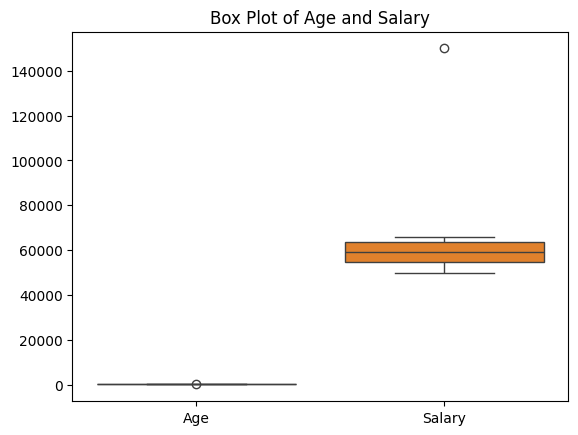

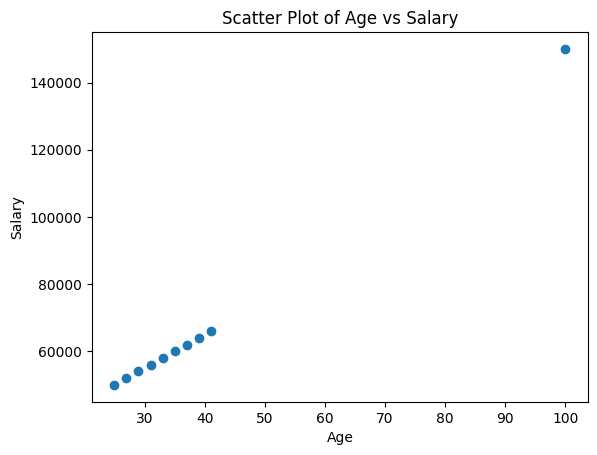

In [3]:
# Box plot
sns.boxplot(data=df[['Age', 'Salary']])
plt.title("Box Plot of Age and Salary")
plt.show()

# Scatter plot
plt.scatter(df['Age'], df['Salary'])
plt.title("Scatter Plot of Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

## Z-Score Method

The Z-Score measures how far a data point is from the mean in terms of standard deviations. Data points with a Z-Score above a certain threshold (e.g., 3) are considered outliers.


In [4]:
# Calculate Z-Score
z_scores = np.abs(zscore(df[['Age', 'Salary']]))
print("Z-Scores:\n", z_scores)

# Threshold for outlier detection
threshold = 2.5
outliers_z = (z_scores > threshold).any(axis=1)

# Filter out outliers
df_z_cleaned = df[~outliers_z]

# Display results
print("Outliers Detected by Z-Score:\n", df[outliers_z])
print("\nCleaned Dataset (Z-Score Method):\n", df_z_cleaned)

Z-Scores:
         Age    Salary
0  0.710543  0.613597
1  0.613870  0.542249
2  0.517198  0.470900
3  0.420525  0.399552
4  0.323853  0.328203
5  0.227180  0.256855
6  0.130508  0.185506
7  0.033835  0.114158
8  0.062837  0.042809
9  2.914676  2.953829
Outliers Detected by Z-Score:
    ID  Age  Salary
9  10  100  150000

Cleaned Dataset (Z-Score Method):
    ID  Age  Salary
0   1   25   50000
1   2   27   52000
2   3   29   54000
3   4   31   56000
4   5   33   58000
5   6   35   60000
6   7   37   62000
7   8   39   64000
8   9   41   66000


## Interquartile Range (IQR)

The IQR is the range between the first quartile (Q1) and the third quartile (Q3). Any data point outside 1.5 times the IQR (above Q3 or below Q1) is considered an outlier.


In [5]:
# Calculate IQR for Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
outliers_iqr_age = ~((df['Age'] >= Q1_age - 1.5 * IQR_age) & (df['Age'] <= Q3_age + 1.5 * IQR_age))

# Calculate IQR for Salary
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary = df['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
outliers_iqr_salary = ~((df['Salary'] >= Q1_salary - 1.5 * IQR_salary) & (df['Salary'] <= Q3_salary + 1.5 * IQR_salary))

# Combine outliers
outliers_iqr = outliers_iqr_age | outliers_iqr_salary

# Filter out outliers
df_iqr_cleaned = df[~outliers_iqr]

# Display results
print("Outliers Detected by IQR:\n", df[outliers_iqr])
print("\nCleaned Dataset (IQR Method):\n", df_iqr_cleaned)

Outliers Detected by IQR:
    ID  Age  Salary
9  10  100  150000

Cleaned Dataset (IQR Method):
    ID  Age  Salary
0   1   25   50000
1   2   27   52000
2   3   29   54000
3   4   31   56000
4   5   33   58000
5   6   35   60000
6   7   37   62000
7   8   39   64000
8   9   41   66000


## Box Plot Method

Box plots provide a visual representation of outliers based on the IQR. Points outside the whiskers are flagged as potential outliers.


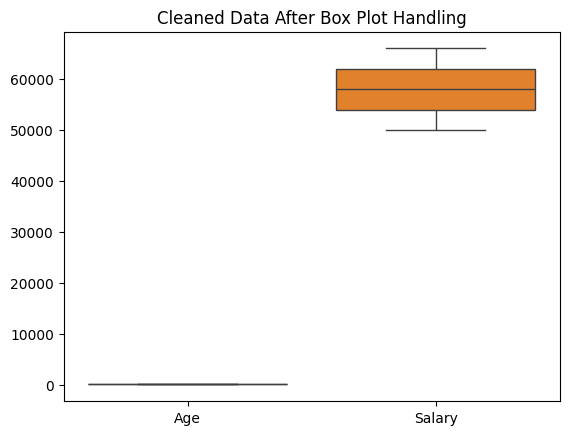

In [6]:
# Outliers have been addressed in IQR; visualization reinforces it
sns.boxplot(data=df_iqr_cleaned[['Age', 'Salary']])
plt.title("Cleaned Data After Box Plot Handling")
plt.show()

## Scatter Plot Analysis

Scatter plots help visualize outliers in the relationship between two variables. Outliers detected earlier are confirmed visually.


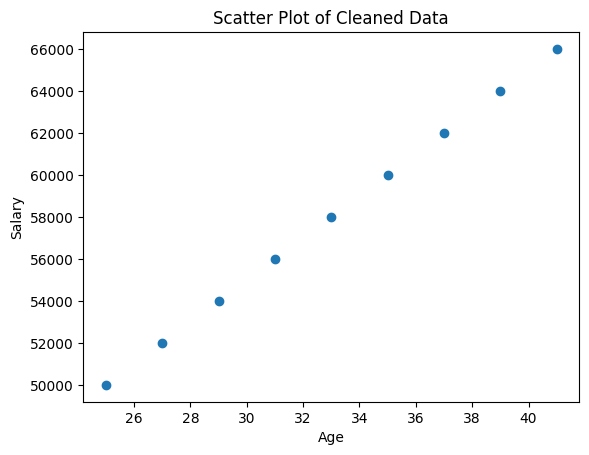

In [7]:
# Scatter plot after cleaning
plt.scatter(df_iqr_cleaned['Age'], df_iqr_cleaned['Salary'])
plt.title("Scatter Plot of Cleaned Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

## Summary of Outlier Handling

1. **Z-Score Method**:
   - Detected and removed rows where Z-Score > 3.

2. **Interquartile Range (IQR)**:
   - Detected and removed rows outside the 1.5*IQR range.

3. **Box Plot**:
   - Visualized outliers and confirmed IQR results.

4. **Scatter Plot**:
   - Used to inspect outliers and the relationship between variables.

Each method helped clean the data while retaining meaningful information.
